# Importing the Datasets and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
df.drop(['ID'],axis=1,inplace=True)

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [9]:
df.isnull().any()

age           False
job           False
marital       False
education     False
default       False
balance       False
housing       False
loan          False
contact       False
day           False
month         False
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
subscribed    False
dtype: bool

<AxesSubplot:>

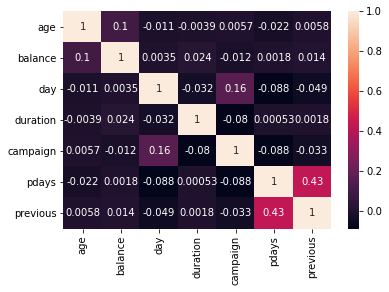

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [11]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


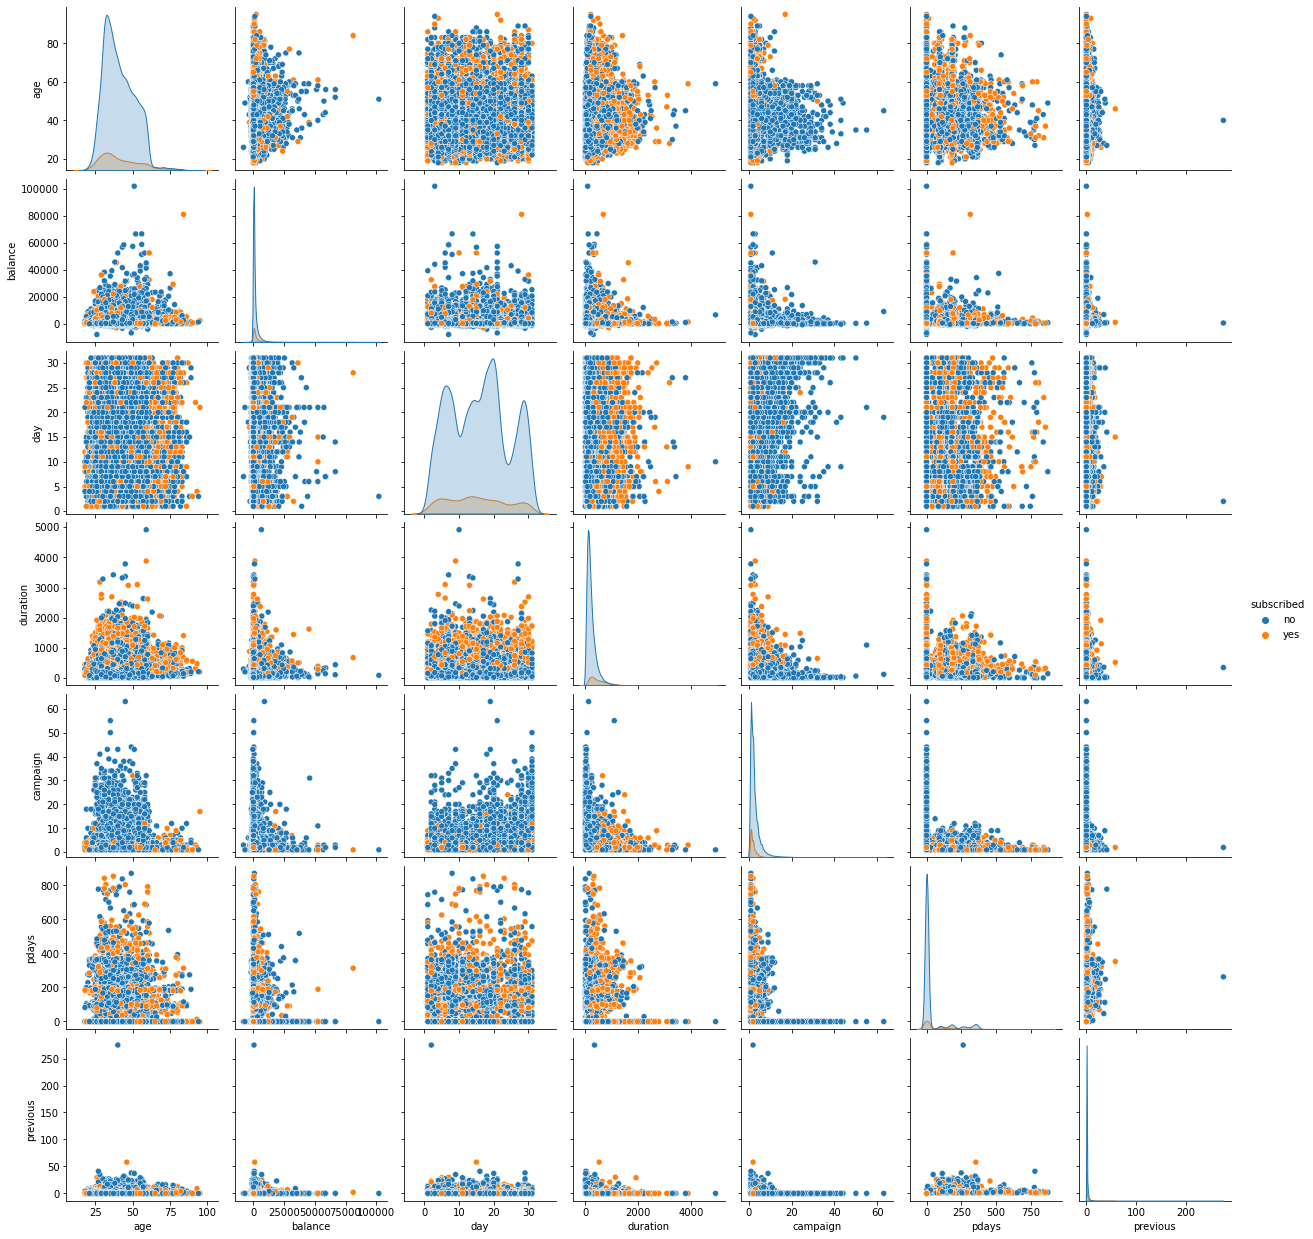

In [12]:
sns.pairplot(df,hue='subscribed')

<AxesSubplot:xlabel='age', ylabel='balance'>

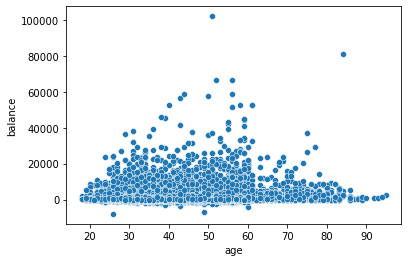

In [13]:
sns.scatterplot(x='age',y='balance',data=df)

# Dealing With Categorical Data

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [16]:
ct=ColumnTransformer([("on",OneHotEncoder(drop='first'),[1,2,3,4,6,7,8,10,15,16])],remainder='passthrough')

In [17]:
df=ct.fit_transform(df)
df

<31647x43 sparse matrix of type '<class 'numpy.float64'>'
	with 372122 stored elements in Compressed Sparse Row format>

In [18]:
df=pd.DataFrame(df.toarray())
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,56.0,1933.0,19.0,44.0,2.0,-1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,31.0,3.0,20.0,91.0,2.0,-1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,27.0,891.0,18.0,240.0,1.0,-1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,57.0,3287.0,22.0,867.0,1.0,84.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,31.0,119.0,4.0,380.0,1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,29.0,0.0,12.0,116.0,2.0,-1.0,0.0
31643,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,53.0,380.0,5.0,438.0,2.0,-1.0,0.0
31644,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,32.0,312.0,7.0,37.0,3.0,-1.0,0.0
31645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,57.0,225.0,15.0,22.0,7.0,337.0,12.0


# Dealing with Outliers

In [19]:
from scipy import stats


In [20]:
z=np.abs(stats.zscore(df))
z


array([[0.52519662, 0.18138149, 0.16852751, ..., 0.24590574, 0.40855484,
        0.23705869],
       [0.52519662, 0.18138149, 0.16852751, ..., 0.24590574, 0.40855484,
        0.23705869],
       [0.52519662, 0.18138149, 0.16852751, ..., 0.56705872, 0.40855484,
        0.23705869],
       ...,
       [0.52519662, 0.18138149, 0.16852751, ..., 0.07524724, 0.40855484,
        0.23705869],
       [0.52519662, 0.18138149, 0.16852751, ..., 1.35985916, 2.99472279,
        4.71652095],
       [0.52519662, 0.18138149, 0.16852751, ..., 0.24590574, 0.40855484,
        0.23705869]])

In [21]:
threshold=3
np.where(z>threshold)

(array([    0,     0,     0, ..., 31645, 31645, 31646], dtype=int64),
 array([15, 19, 29, ..., 19, 42, 39], dtype=int64))

In [22]:
df_no_outliers=df[(z<=3).all(axis=1)]
df_no_outliers

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,50.0,1811.0,8.0,97.0,4.0,-1.0,0.0
13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,39.0,1877.0,6.0,185.0,1.0,-1.0,0.0
14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,43.0,960.0,15.0,436.0,1.0,-1.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,53.0,719.0,14.0,230.0,1.0,-1.0,0.0
18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,44.0,4031.0,7.0,983.0,4.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,43.0,2968.0,20.0,30.0,4.0,-1.0,0.0
31641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,37.0,1309.0,6.0,442.0,2.0,-1.0,0.0
31642,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,29.0,0.0,12.0,116.0,2.0,-1.0,0.0
31643,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,53.0,380.0,5.0,438.0,2.0,-1.0,0.0


In [23]:
x=df_no_outliers.iloc[:,:-1].values
x

array([[  0.,   0.,   0., ...,  97.,   4.,  -1.],
       [  0.,   0.,   0., ..., 185.,   1.,  -1.],
       [  1.,   0.,   0., ..., 436.,   1.,  -1.],
       ...,
       [  0.,   0.,   0., ..., 116.,   2.,  -1.],
       [  0.,   0.,   0., ..., 438.,   2.,  -1.],
       [  0.,   0.,   0., ...,  37.,   3.,  -1.]])

In [24]:
y=df_no_outliers.iloc[:,-1].values
y

array([0., 0., 0., ..., 0., 0., 0.])

# Spliting the Dataset into Train and Test

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Using Random Forest to build the Model

In [27]:
RandomForestClassifier()

RandomForestClassifier()

In [28]:
rf_grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators':np.arange(1,50),'criterion':["gini","entropy"],'max_depth':np.arange(2,10)},cv=5)

In [29]:
df=rf_grid.fit(x_train,y_train)
df

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [30]:
rf_grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 27}

In [31]:
rf=RandomForestClassifier(n_estimators=44,max_depth=9)

In [32]:
model=rf.fit(x_train,y_train)
model

RandomForestClassifier(max_depth=9, n_estimators=44)

In [33]:
y_pred1=model.predict(x_test)
y_pred1

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1) #accuracy of the model is coming 

0.9682539682539683

In [35]:
df1=pd.read_csv('test.csv')

In [36]:
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [37]:
df1.drop(['ID'],axis=1,inplace=True)

In [38]:
dt=ColumnTransformer([("on",OneHotEncoder(drop='first'),[1,2,3,4,6,7,8,10,15])],remainder='passthrough')
df1=dt.fit_transform(df1)
df1

<13564x42 sparse matrix of type '<class 'numpy.float64'>'
	with 157707 stored elements in Compressed Sparse Row format>

In [39]:
df1=pd.DataFrame(df1.toarray())
df1

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,32.0,118.0,15.0,20.0,6.0,-1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,78.0,2787.0,1.0,372.0,1.0,-1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,31.0,144.0,16.0,676.0,1.0,-1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,57.0,3777.0,13.0,65.0,2.0,-1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,45.0,-705.0,3.0,111.0,1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,39.0,45.0,28.0,148.0,4.0,-1.0,0.0
13560,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,54.0,2281.0,20.0,158.0,1.0,-1.0,0.0
13561,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,35.0,285.0,29.0,136.0,1.0,-1.0,0.0
13562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,29.0,464.0,9.0,208.0,2.0,91.0,3.0


In [40]:
y_pred=model.predict(df1)
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [41]:
final=pd.DataFrame()

In [42]:
final['ff']=y_pred

In [43]:
final.to_csv('finals.csv',header=True,index=False)